### **Import data**

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000,'display.max_rows',None, 'display.max_columns',None)

# Plot options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style = 'whitegrid')


In [2]:
import os
os.listdir(os.getcwd())

['LendingLoanEDA.ipynb',
 'README.md',
 '.ipynb_checkpoints',
 '.git',
 'accepted_2007_to_2018Q4.csv.gz']

In [3]:
loans = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression ='gzip',low_memory=True)

/var/folders/8f/c3wp81s97mx_4cyjt0ks4rc80000gn/T/ipykernel_52245/393940706.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression ='gzip',low_memory=True)


Check basic dataframe info:

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


There are 2.3 million rows and 151 variables. The size of the dataset is 2.5+GB

In [5]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1886245,2308404,NaN,19075.0,19075.0,19075.0,60 months,17.77,482.00,D,D1,Washington County Schools,9 years,MORTGAGE,62000.0,Verified,Dec-2012,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=2308404,Borrower added on 12/19/12 > credit cards/consolidate loans<br>,credit_card,Credit card refinancing,279xx,NC,9.93,0.0,Nov-2000,690.0,694.0,0.0,71.0,NaN,22.0,0.0,16059.0,71.4,36.0,f,0.00,0.00,11250.210000,11250.21,4335.72,4809.80,0.0,2104.69,20.9221,Aug-2014,482.00,NaN,Oct-2016,654.0,650.0,0.0,75.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,169550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22500.0,NaN,NaN,NaN,6.0,8478.0,269.0,98.1,0.0,0.0,94.0,147.0,31.0,5.0,0.0,94.0,NaN,NaN,71.0,0.0,2.0,4.0,2.0,6.0,24.0,7.0,12.0,4.0,22.0,0.0,0.0,0.0,3.0,97.0,100.0,0.0,0.0,183891.0,169550.0,14400.0,161391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1891953,2216846,NaN,8500.0,8500.0,8500.0,36 months,13.11,286.85,B,B4,Department of Justice,10+ years,MORTGAGE,105000.0,Not Verified,Nov-2012,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=2216846,NaN,debt_consolidation,Debt Consolidation,282xx,NC,22.80,2.0,Jan-1988,685.0,689.0,0.0,13.0,NaN,13.0,0.0,31585.0,84.0,32.0,f,0.00,0.00,9926.915865,9926.92,8500.00,1426.92,0.0,0.00,0.0000,Aug-2014,4478.40,NaN,Mar-2019,649.0,645.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,46594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37600.0,NaN,NaN,NaN,1.0,3584.0,1190.0,93.6,0.0,0.0,303.0,273.0,20.0,20.0,0.0,20.0,

**Response variable: loan status**

In [6]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

For the simplicity of this project, we only consider the loan that is fully paid or charged off.

In [7]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid','Charged Off'])]

In [8]:
loans.shape # There are 1.3 million loans remaining

(1345310, 151)

In [9]:
loans['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [10]:
# status counts as percentage
loans['loan_status'].value_counts(normalize=True)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

About 80% of the remaining loans have been fully paid and 20% have charged off, so we have a somewhat unbalanced classification problem.

### **Feature selection**

The full dataset has 151 features for each loan. We will select features in two steps:
1. Drop features with more than 30% of their data missing
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

1. Drop the features missing more than 30% data

In [11]:
# Calculate the percentage of missing data for each feature
missing_fraction = loans.isnull().mean().sort_values(ascending=False)
# Top 10 features missing the most data:
missing_fraction.head(10)

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_length                               0.995723
hardship_type                                 0.995723
hardship_reason                               0.995723
hardship_status                               0.995723
deferral_term                                 0.995723
hardship_amount                               0.995723
dtype: float64

In [12]:
# store all variables missing more than 30% data:
drop_list = sorted(list(missing_fraction[missing_fraction > 0.3].index))
len(drop_list) # 58 features will be dropped
loans.drop(labels=drop_list, axis = 1, inplace = True)
loans.shape # (1345310, 93)


(1345310, 93)

2. Only keep loan features known to potential investors

In [13]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

After checking the description in the data dictionary, I am using my best available knowledge to determine which loan features are known to potential investors and only keep those features in our data set.

In [20]:
keep_list = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
'home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','title','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type',
'mort_acc','pub_rec_bankruptcies']

# only keep those features in the data set
loans = loans[keep_list]

loans.shape # (1345310, 26)

(1345310, 26)

### **EDA**

In [23]:
loans.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344453e+06,1.345310e+06,1.298029e+06,1.344613e+06
mean,1.441997e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,1.159352e+01,2.152760e-01,1.624811e+04,5.181002e+01,2.498084e+01,1.670783e+00,1.344439e-01
std,8.717051e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,5.473789e+00,6.018647e-01,2.232817e+04,2.452107e+01,1.199847e+01,2.000444e+00,3.779285e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,8.000000e+00,0.000000e+00,5.943000e+03,3.340000e+01,1.600000e+01,0.000000e+00,0.000000e+00
50%,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,1.100000e+01,0.000000e+00,1.113400e+04,5.220000e+01,2.300000e+01,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,1.400000e+01,0.000000e+00,1.975575e+04,7.070000e+01,3.200000e+01,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,5.100000e+01,1.200000e+01


In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  object 
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  object 
 12  loan_status           1345310 non-null  object 
 13  purpose               1345310 non-null  object 
 14  title                 1328651 non-

**Loan status**

Current status of the loan

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

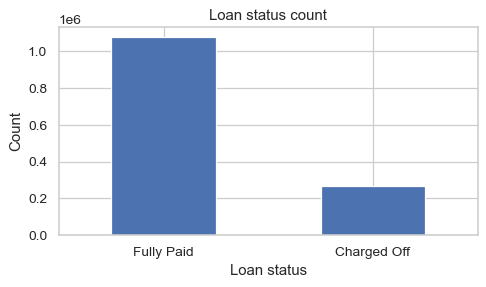

In [37]:
plt.figure(figsize=(6,3), dpi=90)
loans.value_counts('loan_status').plot.bar(x='loan_status')
plt.title('Loan status count')
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.xticks(rotation = 0)

**Correlation**

<AxesSubplot:>

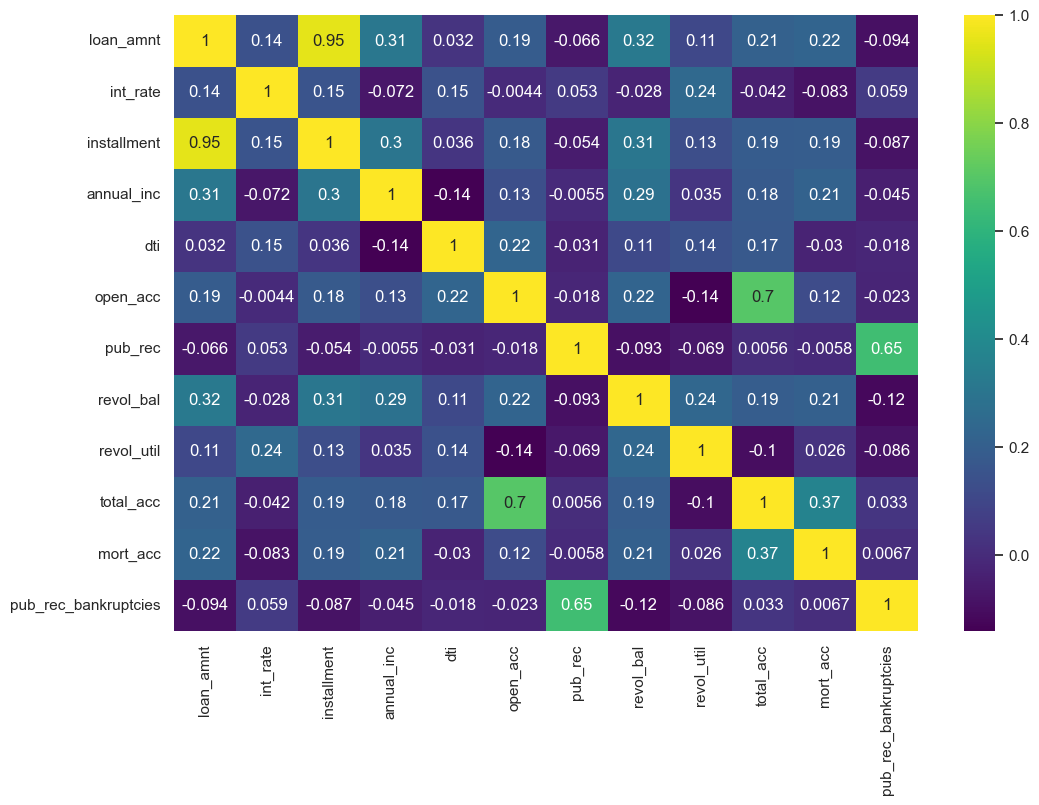

In [39]:
plt.figure(figsize = (12,8))
sns.heatmap(loans.corr(), annot = True, cmap = 'viridis')

From the above heatmap, we noticed that the correlation between 'loan_amt and 'installment' is very high (0.95). Are they duplicate information?

* installment: The monthly payment owed by the borrower if the loan originates.
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Text(0.5, 1.0, 'Loan Amount by loan status')

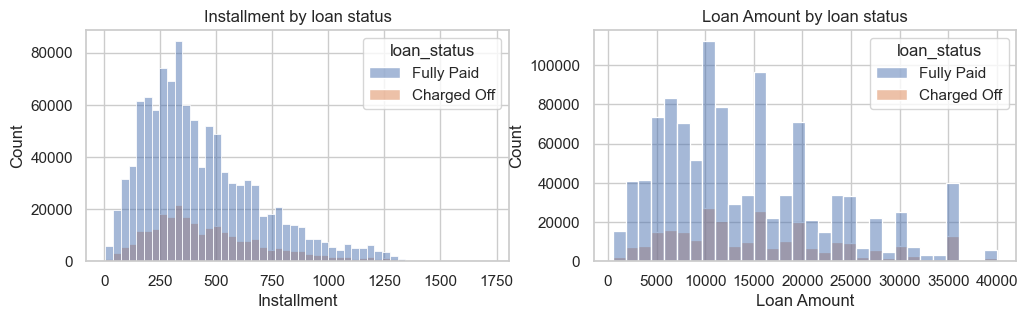

In [47]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.histplot(data = loans, x = loans['installment'], hue = 'loan_status', bins = 50, ax= ax1)
ax1.set_xlabel('Installment')
ax1.set_ylabel('Count')
ax1.set_title('Installment by loan status')

sns.histplot(data = loans, x = loans['loan_amnt'], hue = 'loan_status', bins = 30, ax= ax2)
ax2.set_xlabel('Loan Amount')
ax2.set_ylabel('Count')
ax2.set_title('Loan Amount by loan status')



Text(0.5, 1.0, 'Loan status by loan amount')

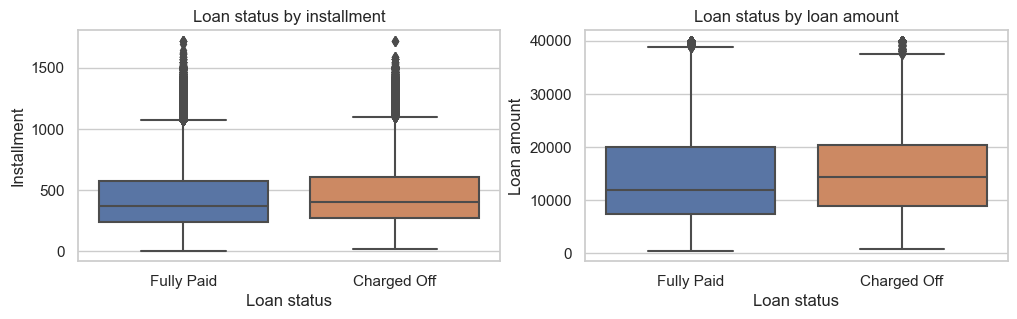

In [48]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.boxplot(data = loans, y = 'installment', x = 'loan_status', ax= ax1)
ax1.set_ylabel('Installment')
ax1.set_xlabel('Loan status')
ax1.set_title('Loan status by installment')

sns.boxplot(data = loans, y = 'loan_amnt', x = 'loan_status', ax= ax2)
ax2.set_xlabel('Loan status')
ax2.set_ylabel('Loan amount')
ax2.set_title('Loan status by loan amount')

In [76]:
def plot_var(col_name, full_name, continuous):
    f,(ax1,ax2) = plt.subplots(nrows = 1,  ncols =2, figsize = (12,3))

    # Plot without loan status: plot the count of the variable
    if continuous:
        sns.histplot(data = loans, x = col_name, bins = 50, ax=ax1)

    else:
        sns.countplot(data = loans, x = col_name, order = sorted(loans[col_name].unique()), ax = ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(data = loans, x = col_name, y = 'loan_status', ax = ax2)
        ax2.set_title(full_name + ' by Loan Status')
    else:
        default_rate = loans.groupby(col_name)['loan_status'].value_counts(normalize = True).loc[:,'Charged Off']
        sns.barplot(x=default_rate.index, y = default_rate.values, ax = ax2)
        ax2.set_title('Default Rate by' + full_name)

    plt.tight_layout()

**loan_amnt**

In [74]:
loans['loan_amnt'].describe() 
# Loan range from $500 to $40000 with a median of $12,000

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

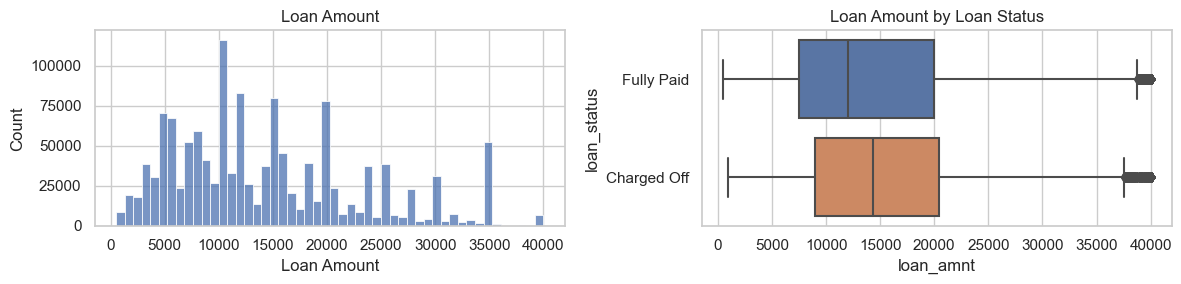

In [77]:
plot_var('loan_amnt','Loan Amount', continuous = True)

**Term**

Data dictionary: the number of payments on the loan. Values are in months and can be either 36 or 60.

In [79]:
loans['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

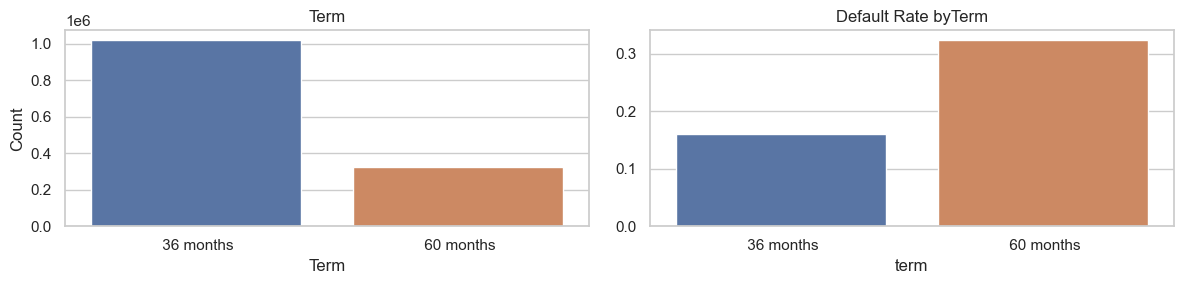

In [80]:
plot_var('term','Term', continuous = False)